In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy import optimize
from scipy import interpolate

In [46]:
data = np.loadtxt('HoverH0.dat', skiprows=1, unpack=True)

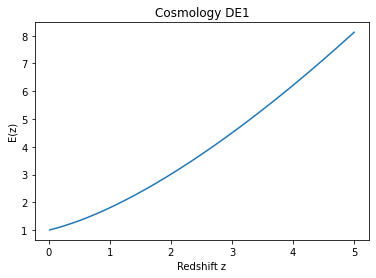

In [47]:
plt.figure()
plt.title('Cosmology DE1')
plt.xlabel('Redshift z')
plt.ylabel('E(z)')
plt.plot(data[0], data[2])
plt.show()

Interpolation of E(z) for use later on 

In [48]:
EofZ = [None]*(len(data)-1)
for i in range(1, len(data)):
	EofZ[i-1] = interpolate.interp1d(data[0], data[i], 'cubic')

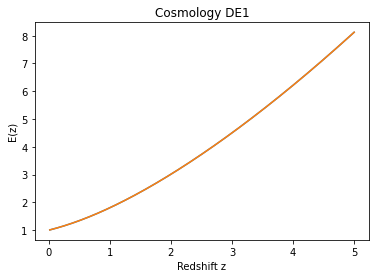

In [49]:
plt.figure()
plt.title('Cosmology DE1')
plt.xlabel('Redshift z')
plt.ylabel('E(z)')
plt.plot(data[0], data[2])
plt.plot(data[0], EofZ[1](data[0]))
plt.show()

# Distances

# Comoving distance
Trapezoidal rule is used for the integration
$$\int_{0}^{z}\frac{cdz}{H(z)} = \frac{c}{H_{0}} \int_{0}^{z}\frac{dz}{E(z)}$$

In [50]:
integral = [None] * (len(data)-1)
for i in range(1, len(data)):
	integral[i-1] = integrate.cumtrapz(1.0 / data[i], data[0], initial=0) * 4282.7494 #4062228428.184282 # Times value of Hubble distance

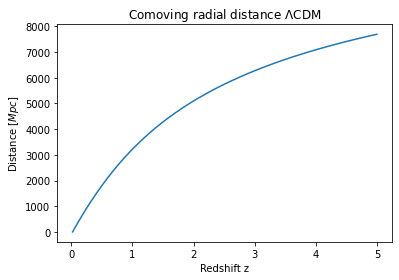

In [51]:
comoving = integral
plt.figure()
plt.title('Comoving radial distance $\Lambda$CDM')
plt.xlabel('Redshift z')
plt.ylabel('Distance [$Mpc$]')
plt.plot(data[0], comoving[0])
plt.show()

## Luminosity distance

In [52]:
luminosity = [None] * (len(data)-1)
for i in range(1, len(data)):
	luminosity[i-1] = (1 + data[0]) * integral[i-1]

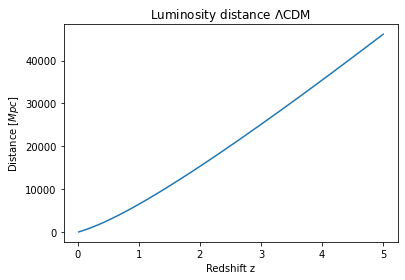

In [53]:
plt.figure()
plt.title('Luminosity distance $\Lambda$CDM')
plt.xlabel('Redshift z')
plt.ylabel('Distance [$Mpc$]')
plt.plot(data[0], luminosity[0])
plt.show()

## Angular distance

In [54]:
angular = [None] * (len(data)-1)
for i in range(1, len(data)):
	angular[i-1] = integral[i-1] / (1 + data[0])

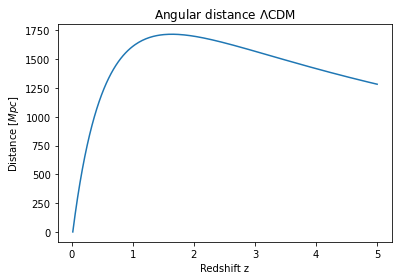

In [55]:
plt.figure()
plt.title('Angular distance $\Lambda$CDM')
plt.xlabel('Redshift z')
plt.ylabel('Distance [$Mpc$]')
plt.plot(data[0], angular[0])
plt.show()

## Diameter distance

In [56]:
k = [0, 0, 0, 1, 1, 1, 1, 1]
diameter = [None] * (len(data)-1)
for i in range(1, len(data)):
	if k[i - 1] == 1:
		diameter[i-1] = np.sin(comoving[i-1])
	elif k[i - 1] == 0:
		diameter[i-1] = comoving[i-1]
	elif k[i - 1] == -1:
		diameter[i-1] = np.sinh(comoving[i-1])

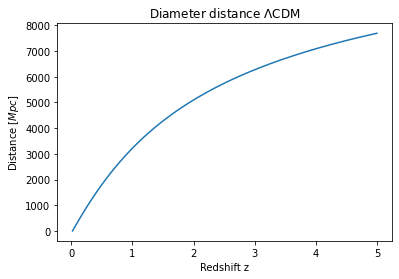

In [57]:
plt.figure()
plt.title('Diameter distance $\Lambda$CDM')
plt.xlabel('Redshift z')
plt.ylabel('Distance [$Mpc$]')
plt.plot(data[0], diameter[0])
plt.show()

Putting them all together

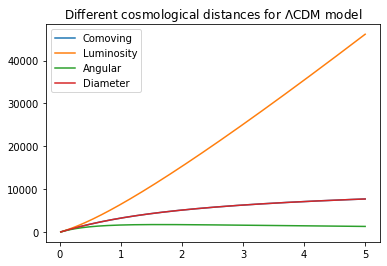

In [58]:
plt.figure()
plt.title('Different cosmological distances for $\Lambda$CDM model')
plt.plot(data[0], comoving[0], label='Comoving')
plt.plot(data[0], luminosity[0], label='Luminosity')
plt.plot(data[0], angular[0], label='Angular')
plt.plot(data[0], diameter[0], label='Diameter')
plt.legend()
plt.show()

# Volume

In [59]:
omega = 24 * np.pi / 180
volume = [None] * (len(data)-1)
for i in range(1, len(data)):
	volume[i-1] = integrate.cumtrapz(diameter[i-1]**2 / data[i-1], data[0], initial=0) * omega**2 * 3**3

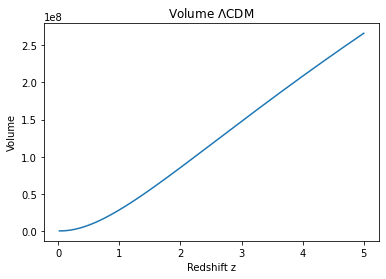

In [60]:
plt.figure()
plt.title('Volume $\Lambda$CDM')
plt.xlabel('Redshift z')
plt.ylabel('Volume')
plt.plot(data[0], volume[0])
plt.show()

## Volume as a function of $z_{final}$ and $z_{initial}$

In [61]:
zFinal = data[0]
zInitial = data[0]

X, Y = np.meshgrid(zFinal, zInitial)

Z = X.copy()

for i in range(len(Z)):
	for b in range(len(Z[i])):
		if i > b:
			Z[i][b] = np.sum(volume[0][b:i])
		else:
			Z[i][b] = np.nan

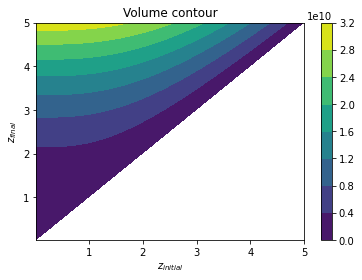

In [62]:
plt.figure()
plt.xlabel('$z_{initial}$')
plt.ylabel('$z_{final}$')
plt.title('Volume contour')
plt.contourf(X, Y, Z)
plt.colorbar()
plt.show()

# Flux

In [63]:
L = np.arange(1, 11) * 1e44
flux = [None] * (len(data)-1)
for i in range(1, len(data)):
	flux[i-1] = [None]*len(L)
	for b in range(len(L)):
		flux[i-1][b] = L[b] / (4 * np.pi * (luminosity[i-1] * 3.086e24)**2)

C:\Users\carle\AppData\Local\Temp/ipykernel_13408/9223510.py:6: RuntimeWarning: divide by zero encountered in true_divide
  flux[i-1][b] = L[b] / (4 * np.pi * (luminosity[i-1] * 3.086e24)**2)


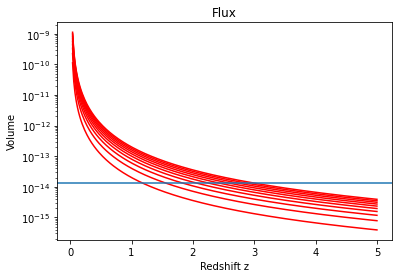

In [64]:
flim = 1.3e-14
plt.figure()
plt.title('Flux')
plt.xlabel('Redshift z')
plt.ylabel('Volume')
for i in range(len(flux[0])):
	plt.semilogy(data[0], flux[0][i], c='red')
plt.axhline(flim)
plt.show()

Interpolation to find the intersections with $F_{min}$

In [65]:
params = [None]*(len(data)-1)
for i in range(1, len(data)):
	params[i-1] = [None]*len(L)
	for b in range(len(L)):
		params[i-1][b] = interpolate.interp1d(np.log10(flux[i-1][b][1:]), data[0][1:], 'cubic')

In [66]:
zMax = [None]*len(params)
for i in range(len(zMax)):
	zMax[i] = [None]*len(L)
	for b in range(len(L)):
		zMax[i][b] = (params[i][b](np.log10(flim)))

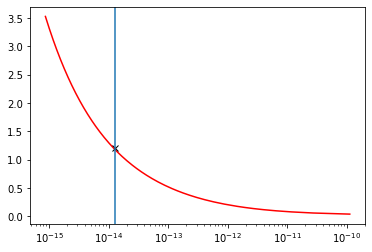

In [67]:
plt.figure()
plt.semilogx(flux[2][0][:-75], data[0][:-75], c='red')
plt.plot(flim, zMax[1][0], 'x', c='black')
plt.axvline(flim)
plt.show()


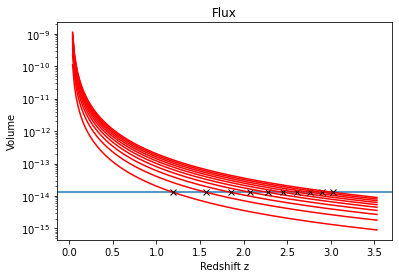

In [68]:
plt.figure()
plt.title('Flux')
plt.xlabel('Redshift z')
plt.ylabel('Volume')
plt.axhline(flim)
for i in range(len(flux[2])):
	plt.semilogy(data[0][:-75], flux[0][i][:-75], c='red')
	plt.plot(zMax[0][i], flim, 'x', c='black')
plt.show()


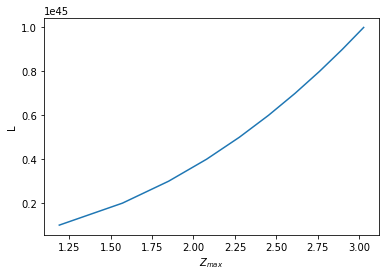

In [69]:
plt.figure()
plt.plot(zMax[0], L)
plt.xlabel('$Z_{max}$')
plt.ylabel('L')
plt.show()

### M relation

In [70]:
m500 = [None] * (len(data)-1)
for i in range(1, len(data)):
	m500[i-1] = [None]*len(zMax[i-1])
	for b in range(len(zMax)):
		m500[i-1][b] = (L[b] / (((0.70/0.72)**-0.39) * np.exp(101.483) * EofZ[i-1](zMax[i-1][b])**1.85))**(1/1.61) * 3.9e14

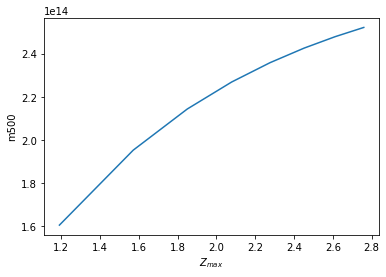

In [71]:
plt.figure()
plt.plot(zMax[0], m500[0])
plt.xlabel('$Z_{max}$')
plt.ylabel('m500')
plt.show()

## Power Spectrum

In [72]:
power = np.loadtxt('Planck+_matterpower.dat', skiprows=0, unpack=True)

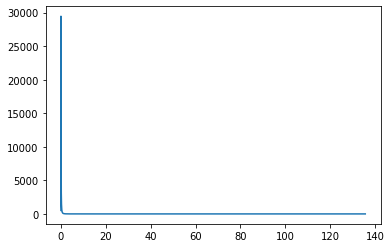

In [73]:
plt.figure()
plt.plot(power[0], power[1])
plt.show()

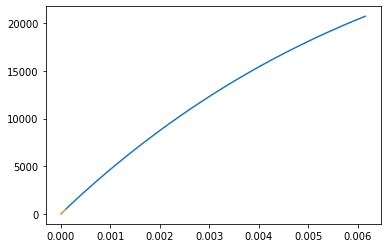

In [74]:
kto0 = np.linspace(0, power[0][0], 10)
linPower = interpolate.interp1d(power[0][:-500], power[1][:-500], 'linear', fill_value='extrapolate')
plt.figure()
plt.plot(power[0][:-500], power[1][:-500])
plt.plot(kto0, linPower(kto0))
plt.show()


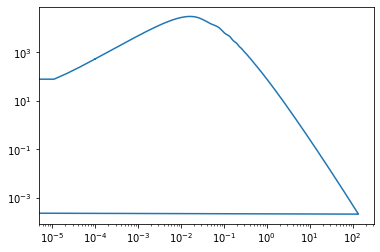

In [78]:
plt.figure()
test = [np.append(power[0], kto0), np.append(power[1], linPower(kto0))]
plt.loglog(test[0], test[1])